# Projet

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('heart_2020_cleaned.csv')

## Exploration

In [209]:
data.shape

(319795, 18)

In [210]:
data.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

On peut observer les valeurs continues

In [211]:
dataNumber = data.select_dtypes('float64')
dataNumber.head(2)


,BMI,PhysicalHealth,MentalHealth,SleepTime
0,16.60,3.00,30.00,5.00
1,20.34,0.00,0.00,7.00


Et les valeurs discrètes 

In [212]:
dataObject = data.select_dtypes('object')
dataObject.head(2)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No


Quantité de valeus nulles => Le fichier ne contient aucune valeur nulle 

In [213]:
data.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

si les données sont corrélées entre elles, si à l’aide
d’une représentation graphique de vos données vous pouvez déjà tirer des théories sur les
features représentant le plus d’informations

=> Il y a 27373 personnes sur les 319795 qui souffrent de maladies cardiaques

=> Sur les 27373 personnes, 16037 d'entre elles fument, 1141 boivent de l'alcool, 890 fument et boivent

=> Sur les 27373 personnes, 15497 ont un temps de sommeil inférieur aux 8 heures recommandées

In [236]:
data[data['HeartDisease'] == 1].count()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [215]:
data[data['HeartDisease'] == 1].count()

HeartDisease        16037
BMI                 16037
Smoking             16037
AlcoholDrinking     16037
Stroke              16037
PhysicalHealth      16037
MentalHealth        16037
DiffWalking         16037
Sex                 16037
AgeCategory         16037
Race                16037
Diabetic            16037
PhysicalActivity    16037
GenHealth           16037
SleepTime           16037
Asthma              16037
KidneyDisease       16037
SkinCancer          16037
dtype: int64

In [216]:
data[(data['HeartDisease'] 1) & (data['Smoking'] == 1)].count()

HeartDisease        15497
BMI                 15497
Smoking             15497
AlcoholDrinking     15497
Stroke              15497
PhysicalHealth      15497
MentalHealth        15497
DiffWalking         15497
Sex                 15497
AgeCategory         15497
Race                15497
Diabetic            15497
PhysicalActivity    15497
GenHealth           15497
SleepTime           15497
Asthma              15497
KidneyDisease       15497
SkinCancer          15497
dtype: int64

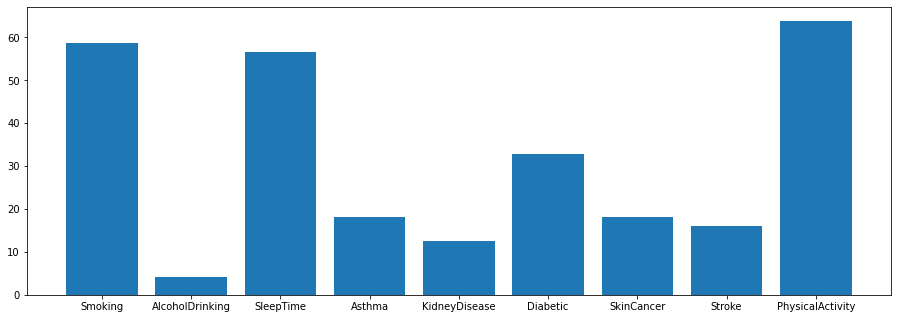

Smoking : 58.586928725386336
AlcoholDrinking : 4.168341066013955
SleepTime : 56.614181858035295
Asthma : 18.021407956745698
KidneyDisease : 12.621926716107112
Diabetic : 32.722025353450476
SkinCancer : 18.19310999890403
Stroke : 16.034048149636504
PhysicalActivity : 63.89142585759691


In [217]:
heartDiseased = data[data['HeartDisease'] == 1]
smoking = len(data[(data['HeartDisease'] == 1) & (data['Smoking'] == 1)]) / len(heartDiseased) * 100
alcool = len(data[(data['HeartDisease'] == 1) & (data['AlcoholDrinking'] == 1)]) / len(heartDiseased) * 100
sleeptime = len(data[(data['HeartDisease'] == 1) & (data['SleepTime'] < 8)]) / len(heartDiseased) * 100
asthma = len(data[(data['HeartDisease'] == 1) & (data['Asthma'] == 1)]) / len(heartDiseased) * 100
kidney = len(data[(data['HeartDisease'] == 1) & (data['KidneyDisease'] == 1)]) / len(heartDiseased) * 100
diabetic = len(data[(data['HeartDisease'] == 1) & (data['Diabetic'] == 1)]) / len(heartDiseased) * 100
skinCancer = len(data[(data['HeartDisease'] == 1) & (data['SkinCancer'] == 1)]) / len(heartDiseased) * 100
stroke = len(data[(data['HeartDisease'] == 1) & (data['Stroke'] == 1)]) / len(heartDiseased) * 100
physicalActivity = len(data[(data['HeartDisease'] == 1) & (data['PhysicalActivity'] == 1)]) / len(heartDiseased) * 100

fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
criterias = ['Smoking', 'AlcoholDrinking', 'SleepTime', 'Asthma', 'KidneyDisease', 'Diabetic', 'SkinCancer', 'Stroke', 'PhysicalActivity']
stats = [smoking, alcool, sleeptime, asthma, kidney, diabetic, skinCancer, stroke, physicalActivity]
ax.bar(criterias, stats)
plt.show()

print(f"Smoking : {smoking}")
print(f"AlcoholDrinking : {alcool}")
print(f"SleepTime : {sleeptime}")
print(f"Asthma : {asthma}")
print(f"KidneyDisease : {kidney}")
print(f"Diabetic : {diabetic}")
print(f"SkinCancer : {skinCancer}")
print(f"Stroke : {stroke}")
print(f"PhysicalActivity : {physicalActivity}")

réaliser une comparaison entre
différents modèles

 Sélectionné le ou les modèles les plus prometteurs selon vous

Améliorer les performances de vos / votre modèle sélectionnés

BMI


C:\Users\naelm\AppData\Local\Temp\ipykernel_9692\1291757220.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  current = heartDiseased.drop('HeartDisease', 1)


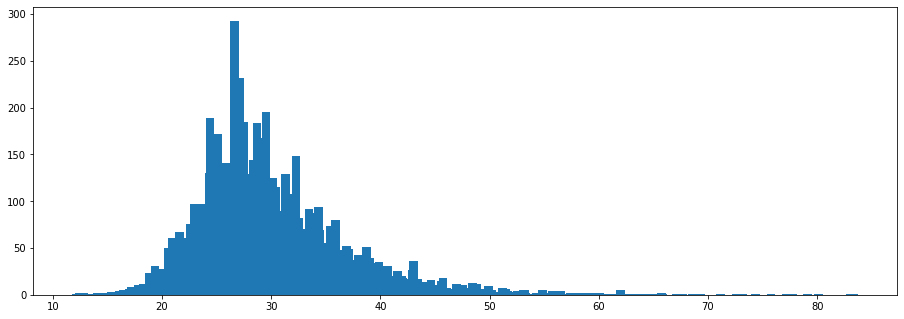

Smoking


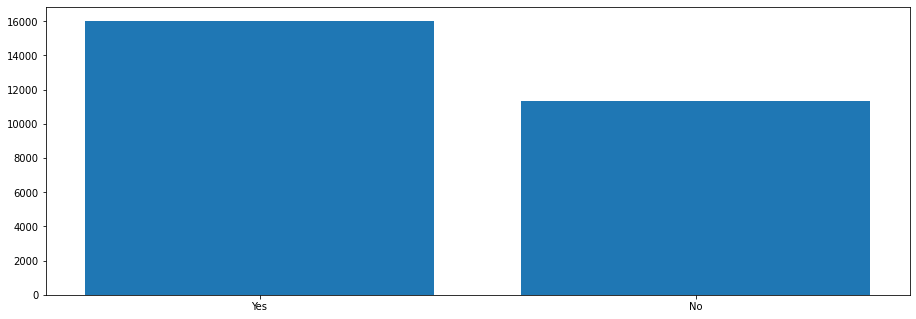

AlcoholDrinking


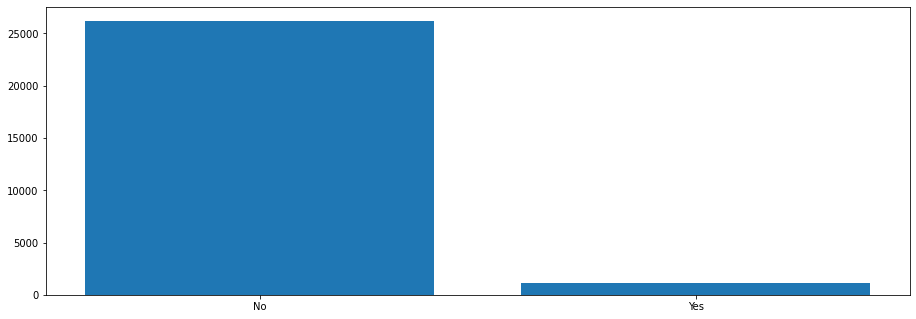

Stroke


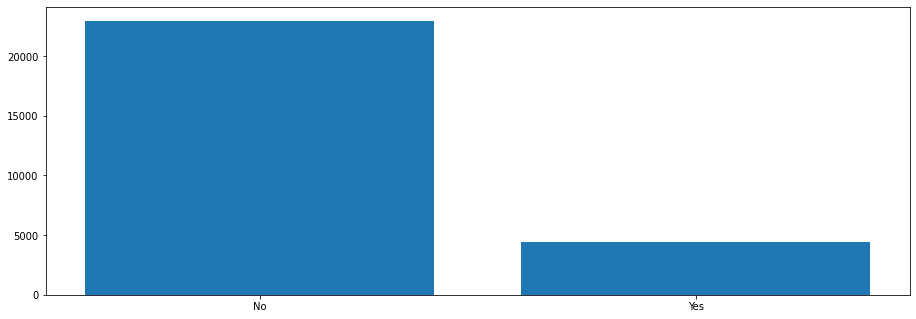

PhysicalHealth


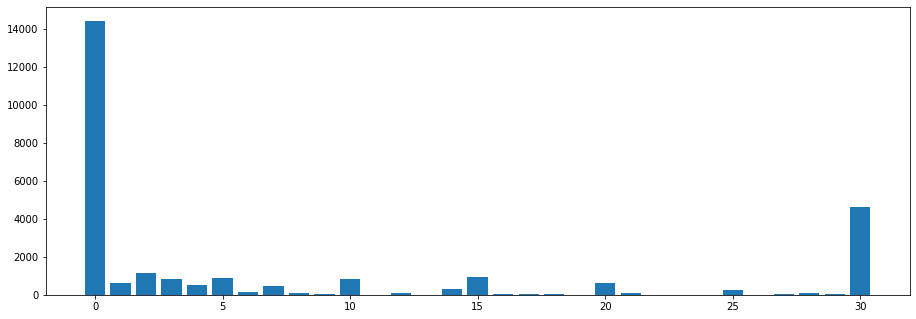

MentalHealth


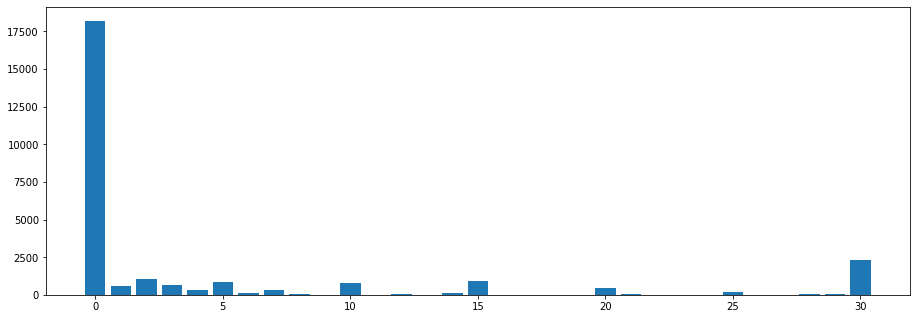

DiffWalking


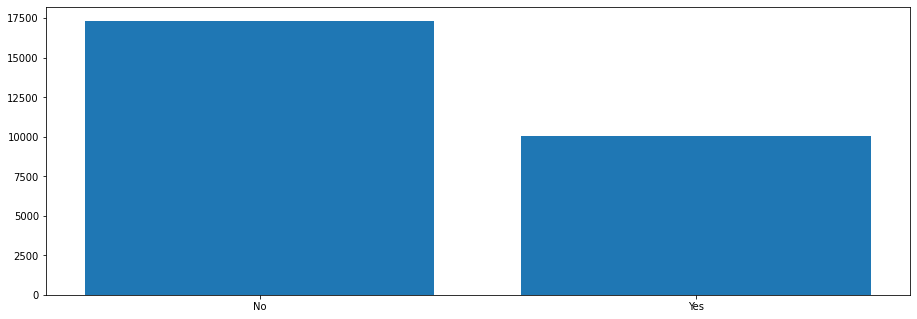

Sex


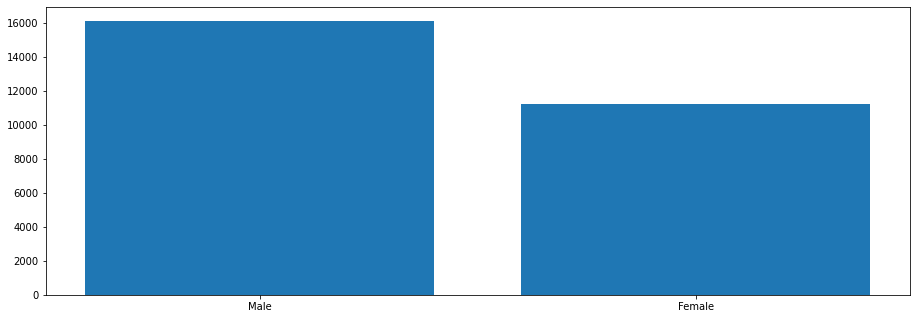

AgeCategory


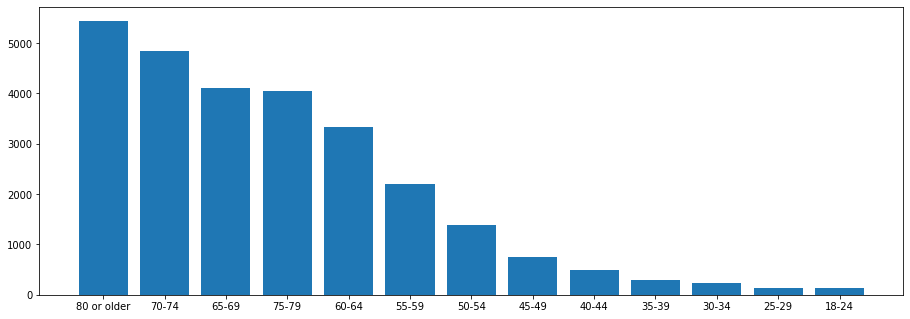

Race


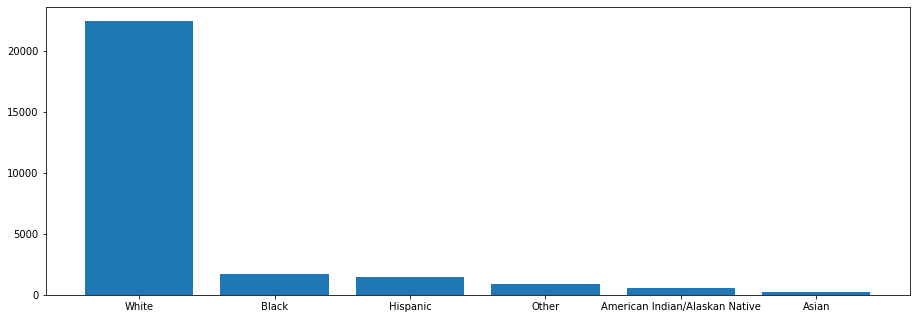

Diabetic


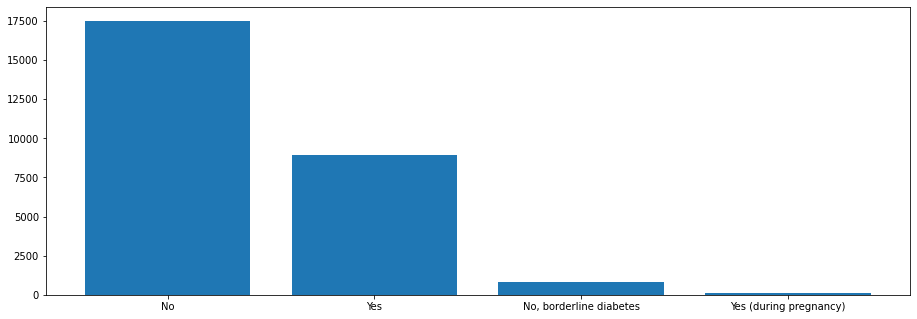

PhysicalActivity


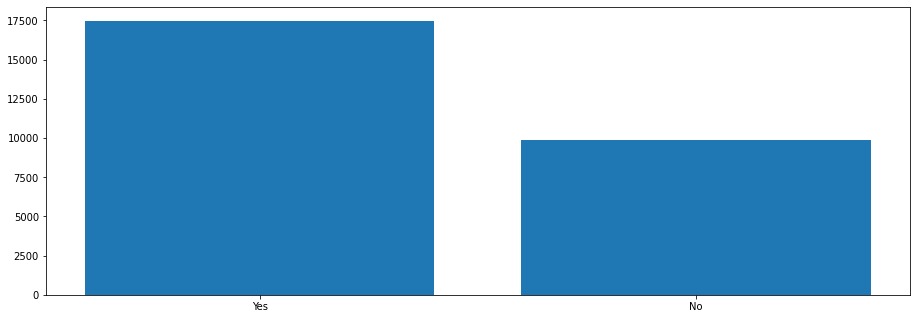

GenHealth


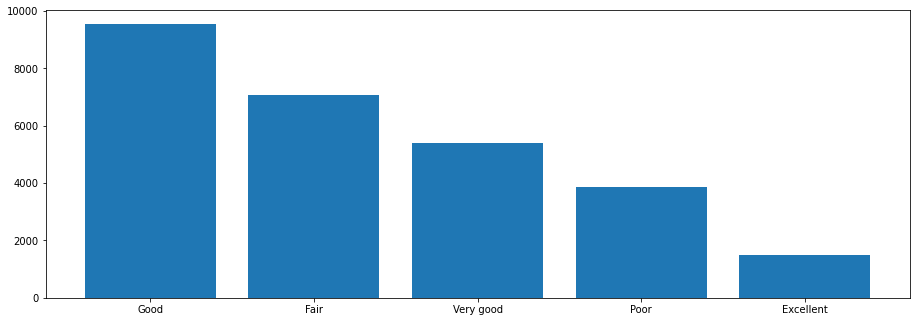

SleepTime


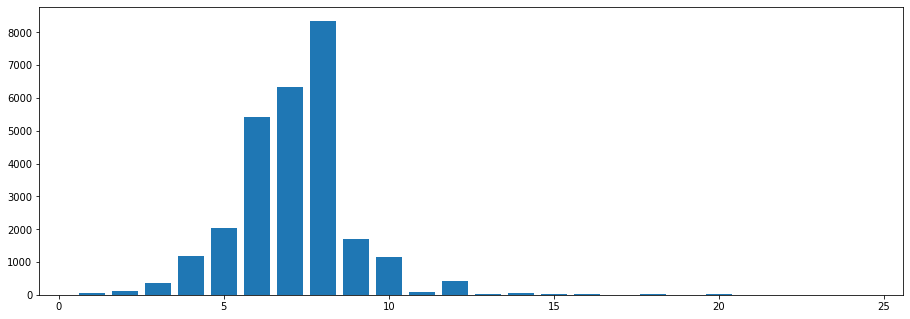

Asthma


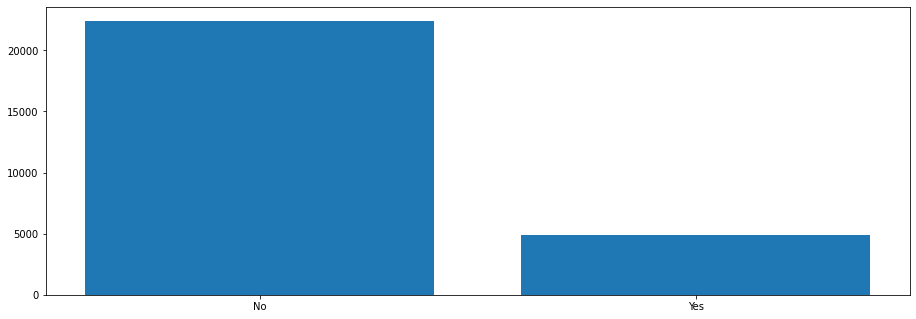

KidneyDisease


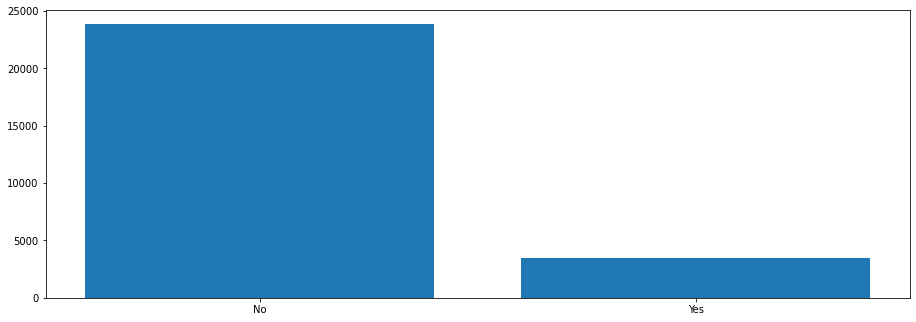

SkinCancer


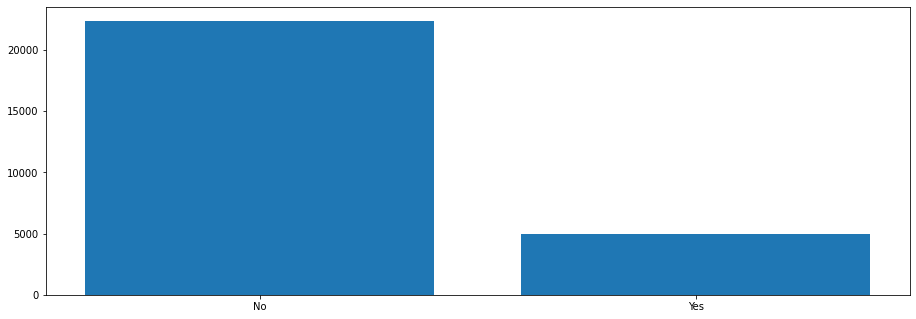

In [218]:
current = heartDiseased.drop('HeartDisease', 1)
for str in current.columns:
    print(str)
    values = current[str].value_counts()
    fig = plt.figure()
    ax = fig.add_axes([0,0,2,1])
    ax.bar(values.index.tolist(), values.tolist())
    plt.show()
